# Curriculum Log Acess Analysis | Report
>Stephanie Jones<br>
Joshua Wheeler<br>
Monday, January 31, 2022

## Ref: Department Management and Staff
Below you will find a summary our analysis of the Codeup Curriculum access logs. Please refer to our `wrangle.py` module to see the functions and code used to acquire and prepare the data for exploratory analysis. Additional information about our findings can be found in our `02_explore_jones` and `02_explore_wheeler` reports and the `curriculum_logs` file contains the raw data in .cav format. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import wrangle

from env import geo_key

In [5]:
# acquiring prepared data from wrangle module
df = wrangle.get_curriculum_logs_data()


The df has 847330 rows and 10 columns.


# Findings
## 1. Across programs, which lesson attracts the most traffic consistently across cohorts?
> Across programs the **mysql lesson** attracts the most traffic, consistently across each cohort.

## 2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?
>### Data Science Lessons
>#### 1. Darden has almost twice as many hits for `clustering/explore` than the other two cohorts
>#### 2. Curie, one of the older cohorts, has more than double the hits for the `mysql-introduction/overview` than the other cohorts who accessed this lesson
>#### 3. Darden has almost double the hits for `stats/compare-means` lesson than Curie or Easley

Lesson | Hit Hard | Glossed Over 
:--- | :--- | :--- | 
1. `clustering/explore` | `Darden` | `Curie`, `Easley` 
2. `sql/mysql-overview / intro` | `Curie` | `Darden`, `Easley`, `Florence`
3. `stats/compare-means` | `Darden`| `Curie`, `Easley` 

## 3. Are there students who, when active, hardly access the curriculum? 
>**Students who hardly accessed the curriculum while active info:** 
>- 183 students accessed the curriculum < first quartile (*391 times*)
    - 163 of these students are from `web_dev` programs
    - 21 are from `data science` programs
    - 1 student is in both programs
>- Average access count of these students is 163 times
>- ~ 30k total access count

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? 
>- United States    1281
>- Mexico              4
>- Germany             3
>- Switzerland         1
>- Canada              1
## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
>It does not look like there was much cross-curriculum access prior to the split.
## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
>**Data Science Graduates Top Access**
>- Fundamentals
>- Classification
>- Regression
>- Anomaly Detection
>- Time Series

>**Web Dev Graduates Top Access**
>- Javascript
>- HTML-CSS
>- MySQL
>- Fundamentals
## 7. Which lessons are least accessed?
>**Data Science**
>- vocabulary
>- acquire-and-prep
>- compare-means

>**Web Dev**
>- extra exercises
>- anomaly-detection/time-series-anomaly-detection
>- prework/fundamentals/functio
>- prework/fundamentals/if-statement

## 8. Anything else I should be aware of?
> Nothing else at this time

# Data Dictionary
Column | Dtype | Description
:-- | :-- | :---
 cohortid | int64 | numeric cohort identifier    
 start_date | datetime64 | date cohort started *yyyy-mm-dd* 
 end_date | datetime64 | date cohort ended *yyyy-mm-dd* 
 cohortname | object | name of cohort       
 program_id | int64 |  numeric program identifier (1 - 4)       
 date | datetime64 | date of access *yyyy-mm-dd*
 time | object | time of access *hh-mm-ss*       
 path | object |  used curriculum lesson identifier, endpoint      
 user_id |  int64 |  unique id for each user we have data for        
 ip | object | ip address used to access curriculum log        
 program_name | object |  name of program, web_dev *combined* or data_science     
 is_staff | bool |  1: staff member or 0: not a staff member         
 main_path | object |  subset of path value, the first part of the endpoint before `/`

# Visualizing the Data

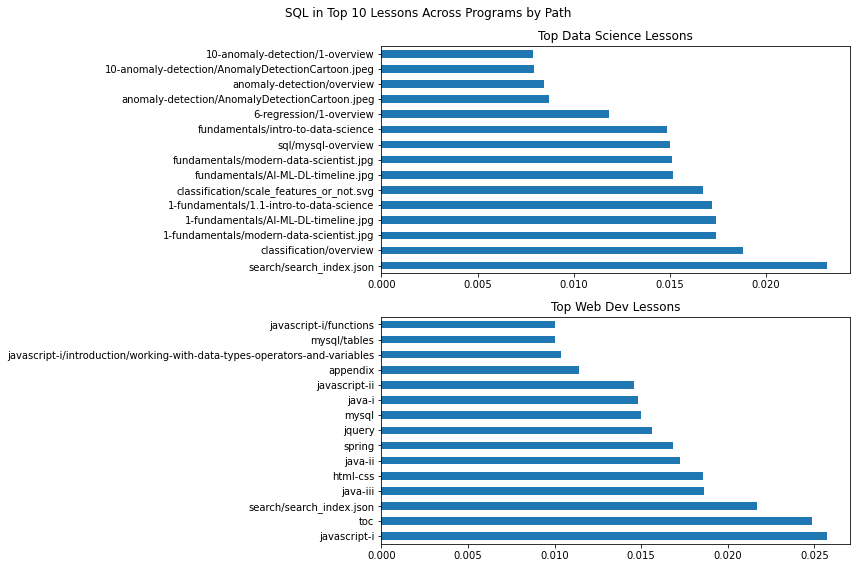

In [16]:
# setting figure size
plt.figure(figsize = (12, 8))

# subplot 1 (top) data science lessons
plt.subplot(2, 1, 1)
df[(df.program_name == 'data_science') & (df.path != '/')].path.value_counts(sorted).head(15).plot.barh()
plt.title('Top Data Science Lessons')

# subplot 2 (bottom) web dev lesson
plt.subplot(2, 1, 2)
df[(df.program_name == 'web_dev') & (df.path != '/')].path.value_counts(sorted).head(15).plot.barh()
plt.title('Top Web Dev Lessons')

# figure title
plt.suptitle('SQL in Top 10 Lessons Across Programs by Path')
plt.tight_layout()
plt.show();